In [42]:
import numpy as np
import sys
%run process.ipynb

In [43]:
X,Y = get_binary_data()

In [44]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

In [45]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [46]:
def forward(X,W,b):
    return sigmoid(X.dot(W)+b)

In [47]:
P_Y_given_X = forward(X,W,b)
predictions = np.round(P_Y_given_X)

In [48]:
# classification rate
def classification_rate(Y,preds):
    return np.mean(Y==preds)

In [49]:
print(classification_rate(Y,predictions))

0.2185929648241206


In [50]:
# if we choose the weights randomly then we dont get good accuracy
# NEXT 
# we do the same by training the weights

In [51]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [52]:
X1,Y1 = get_binary_data()
X1,Y1 = shuffle(X1,Y1)

In [53]:
X1train = X1[:-100]
Y1train = Y1[:-100]
X1test = X1[-100:]
Y1test = Y1[-100:]

In [54]:
D = X1.shape[1]

# setting inital weights randomly
W = np.random.randn(D)
b=0

In [55]:
def cross_entropy(T,P_Y_given_X):
    return -np.mean(T*np.log(P_Y_given_X) + (1-T)*np.log(1-P_Y_given_X))

W:  [1.86864219 7.7754294  0.53589749 1.7481228  3.97020791 2.68700405
 2.75124511 2.64865565]
i : 0, train_cost : 0.16166401787458146, test_cost : 0.27189530253116195
W:  [1.7228759  7.25561073 0.45253713 1.61158706 3.85413947 2.67459807
 2.8004229  2.7221097 ]
i : 1000, train_cost : 0.16046116125649884, test_cost : 0.2637855368845594
W:  [1.63112944 7.02375942 0.41800002 1.52537833 3.79775541 2.67236803
 2.83114573 2.76944896]
i : 2000, train_cost : 0.16018763894218943, test_cost : 0.26106953191628635
W:  [1.58756287 6.92139887 0.40309156 1.48433073 3.77420231 2.67297946
 2.84415277 2.79044115]
i : 3000, train_cost : 0.16013236298225353, test_cost : 0.25998057117580325
W:  [1.56842759 6.8775243  0.39673092 1.46622609 3.76453897 2.67344142
 2.84957801 2.79938441]
i : 4000, train_cost : 0.16012207198078843, test_cost : 0.25953495211989464
W:  [1.56027294 6.85900423 0.39404957 1.45849081 3.76055891 2.67365664
 2.85183854 2.80314694]
i : 5000, train_cost : 0.16012022842490792, test_cost 

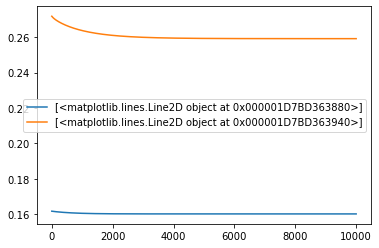

In [62]:
# training weights
train_cost=[]
test_cost=[]
learning_rate = 0.001

for i in range(10000):
    pY1train = forward(X1train,W,b)
    pY1test = forward(X1test,W,b)
    
    cost_train = cross_entropy(Y1train,pY1train)
    cost_test = cross_entropy(Y1test,pY1test)
    
    train_cost.append(cost_train)
    test_cost.append(cost_test)
    
    W -= learning_rate*(X1train).T.dot(pY1train-Y1train)
    b -= learning_rate*(pY1train-Y1train).sum()
    
    if i%1000==0:
        print("W: ",W)
        print(f"i : {i}, train_cost : {cost_train}, test_cost : {cost_test}")
print("train classification rate : ", classification_rate(Y1train,np.round(pY1train)))
print("test classification rate : ", classification_rate(Y1test,np.round(pY1test)))
        
legend1 = plt.plot(train_cost,label='train cost')
legend2 = plt.plot(test_cost,label='test cost')
plt.legend([legend1,legend2])
plt.show()


In [57]:
# now our classification rate is much better after training the 
# weights and bias